# Training Dataset

In [1]:
from sklearn.datasets import load_digits
images, labels = load_digits(2, return_X_y=True)
# Labeled training set
training_images = images[:300]
training_labels = labels[:300]
# Labeled test set
test_images = images[300:]
test_labels = labels[300:]

# k-NN Classification using 2D features

This is a plot of the 2D features of the training data
Points are green if map to 1 and r if map to 0


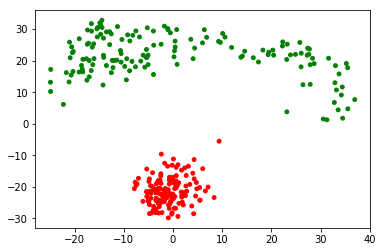

In [7]:
import numpy as np;
from numpy import linalg as la;
import matplotlib.pyplot as plt;
X = np.transpose(training_images);
mean = np.transpose(np.asmatrix(X.mean(1)));
meanv = np.repeat(mean,300,axis=1);
Xc = X-meanv;
U,S,Vt = la.svd(Xc);
Up = U[:,0:2];
Xfeat = np.matmul(np.transpose(Up),Xc);
colors = ['r' if x==0 else 'g' for x in training_labels];
print("This is a plot of the 2D features of the training data");
print("Points are green if map to 1 and r if map to 0");
plt.scatter(Xfeat[1,:].tolist(),Xfeat[0,:].tolist(),15,colors);

This is a plot of the 2D features of the test data
Points are blue if classified correctly by kNN, k=5, and black if incorrect


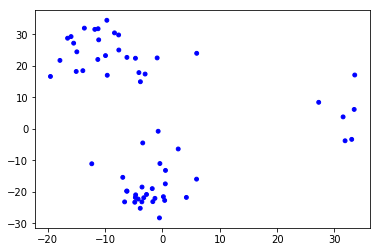

In [3]:
points = np.zeros((2,60));
colors = ['' for x in range(60)];
i = 0;
for testim in test_images:
    x = np.transpose(np.asmatrix(testim));
    xc = x-mean;
    xfeat = np.matmul(np.transpose(Up),xc);
    points[:,i:i+1] = xfeat;
    trainer = np.hstack((np.transpose(Xfeat),np.transpose(np.asmatrix(training_labels))));
    def dist(x):
        return np.sqrt(np.sum(np.asarray(np.transpose(xfeat)-x[0,0:2])**2));
    knear = np.squeeze(sorted(trainer,key=dist))[:5];
    res = int(max(knear[:,2], key=knear[:,2].tolist().count));
    colors[i] = 'b' if res == test_labels[i] else 'k';
    i += 1;
print("This is a plot of the 2D features of the test data");
print("Points are blue if classified correctly by kNN, k=5, and black if incorrect");
plt.scatter(points[1,:].tolist(),points[0,:].tolist(),15,colors);

In this example every point was classified correctly. Thus the set $\{\hat{y_i}\neq y_i\}=\emptyset$, so $\text{error}=\frac{1}{N}\sum_{i=1}^N 1_{\{\hat{y_i}\neq y_i\}}=0$.

# k-NN Classification using higher-dimensional features

In [4]:
energylim = np.sum(S**2);
energy = 0; r = 0;
while (energy/energylim < .95) :
    energy += S[r]**2;
    r += 1;
Ur = U[:,0:r];
Xfeat = np.matmul(np.transpose(Ur),Xc);

In [5]:
points = np.zeros((r,60));
result = np.zeros((5,60));
i = 0;
def dist(x):
    return np.sqrt(np.sum(np.asarray(np.transpose(xfeat)-x[0,0:r])**2));
for testim in test_images:
    x = np.transpose(np.asmatrix(testim));
    xc = x-mean;
    xfeat = np.matmul(np.transpose(Ur),xc);
    trainer = np.hstack((np.transpose(Xfeat),np.transpose(np.asmatrix(training_labels))));
    near = np.squeeze(sorted(trainer,key=dist));
    for k in range(1,10,2) :
        knear = near[:k];
        res = int(max(knear[:,r], key=knear[:,2].tolist().count));
        result[int((k-1)/2)][i] = 0 if res == test_labels[i] else 1;
    i += 1;

In this example, there was no error regardless of the choice of k value
In general, one should choose a centralized k value to mininize expected error
A small k value may select misleading training points which are outliers in the training data
While a large k value would cover a larger range, and might pick up points on the opposite end of the data


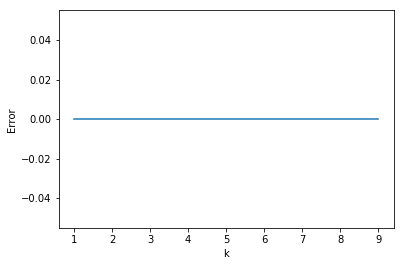

In [6]:
error = [0]*5;
for i in range(0,5) :
    error[i] = 1/60*np.sum(np.asarray(result[i:i+1,:]));
plt.plot(range(1,10,2),error);
plt.xlabel('k'); plt.ylabel('Error');
print('In this example, there was no error regardless of the choice of k value');
print('In general, one should choose a centralized k value to mininize expected error');
print('A small k value may select misleading training points which are outliers in the training data');
print('While a large k value would cover a larger range, and might pick up points on the opposite end of the data');